# In this notebook I plot some spectra on ROI to analyse the IMAT experiment, I start with the VerticalSettings

## Starting from the raw data: Images are loaded, Roi are extracted, plot are produced and finally spectra (original from raw data) are saved as txt files

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import os, fnmatch
from os import listdir
#%matplotlib inline
%matplotlib notebook
import scipy.signal
import matplotlib.patches as patches
from skimage.filters import threshold_otsu
from scipy.stats import binned_statistic
from scipy.signal import resample
# from scipy.signal import find_peaks
# print(scipy.__version__)

In [2]:
# Constant values
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]

# t0=0.01
# L= 56.4 #[m]

# here now I put the number obtained from the flight-path calibration!
t0 =  0.0002466
L = 56.065
lambda0 = 0.017


dL = 0

In [3]:
def tof2l(tof):
    l=lambda0+h/m*(tof-t0)/(L)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L)*m/h
    return tof

In [6]:
rootpath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/'
coll_dir = sorted(fnmatch.filter(listdir(rootpath),'Sample*'))
print(coll_dir)

# pathdata= "/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected/"
# pathdata_180= "/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected/"
pathOB= "/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/"

myTOF = np.genfromtxt('/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/IMAT00010433_VerticalSetting_2hruns_000_Spectra.txt', usecols=0)

['Sample_10090deg_Corrected', 'Sample_10099deg_Corrected', 'Sample_10108deg_Corrected', 'Sample_10117deg_Corrected', 'Sample_10126deg_Corrected', 'Sample_10135deg_Corrected', 'Sample_10144deg_Corrected', 'Sample_10153deg_Corrected', 'Sample_10162deg_Corrected', 'Sample_10171deg_Corrected', 'Sample_10180deg_Corrected']


In [5]:
# #load the dataset

# myfiles = fnmatch.filter(listdir(pathdata),'*.fits')
# coll_files = sorted(myfiles)

# myfiles_180 = fnmatch.filter(listdir(pathdata_180),'*.fits')
# coll_files_180 = sorted(myfiles_180)

# obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
# coll_ob = sorted(obfiles)


In [7]:
coll_files=[]
for i in range(0, len(coll_dir)):
# for i in range(0, 1):
    pathdata = rootpath + coll_dir[i]
    print(pathdata)
    coll_files.append(sorted(fnmatch.filter(listdir(pathdata),'*.fits')))

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)

/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10117deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10126deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10135deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10144deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10153deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10162deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected


In [8]:
coll_files[1][0:10]

['Sample_10099deg_Corrected_00000.fits',
 'Sample_10099deg_Corrected_00001.fits',
 'Sample_10099deg_Corrected_00002.fits',
 'Sample_10099deg_Corrected_00003.fits',
 'Sample_10099deg_Corrected_00004.fits',
 'Sample_10099deg_Corrected_00005.fits',
 'Sample_10099deg_Corrected_00006.fits',
 'Sample_10099deg_Corrected_00007.fits',
 'Sample_10099deg_Corrected_00008.fits',
 'Sample_10099deg_Corrected_00009.fits']

In [ ]:
# Here I test different ROI position

# sumim = np.zeros([512,512])
# for i in range(1, len(coll_dir)):
#     fig,ax =plt.subplots()
#     value = rootpath + coll_dir[i]+'/'+coll_files[i][1500]
#     with fits.open(value) as f:
#         myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)
#     sumim +=myim
#     myim=fits.open(rootpath + coll_dir[i]+'/'+coll_files[i][1500])[0].data.astype(float)
#     ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
#     roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
#     ax.add_patch(roi1)
#     roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
#     ax.add_patch(roi2)

#     roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
#     ax.add_patch(roi3)
#     roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
#     ax.add_patch(roi4)

# fig,ax =plt.subplots()
# ax.imshow(sumim, vmin=150, vmax=1000, cmap='gray')


# roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
# ax.add_patch(roi1)
# roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
# ax.add_patch(roi2)

# roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
# ax.add_patch(roi3)
# roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
# ax.add_patch(roi4)

In [9]:
spectrum_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress2=np.zeros([len(coll_dir), len(coll_files[0])])

In [10]:
# scaling ratios, this of course should be read in a much smarter way, and/or probably managed with dose correction instead of relying on the shutter counts
ob_ratios=np.array([107423.0/121694.0, 107423.0/101050.0, 107423.0/107552.0, 107423.0/96412.0, 107423.0/101731.0, 107423.0/102485.0, 107423.0/97977.0, 107423.0/99884.0, 107423.0/99997.0, 107423.0/107397.0, 107423.0/99095.0] )
print(ob_ratios)

[0.88273046 1.06306779 0.99880058 1.11420777 1.05595148 1.04818266
 1.09641038 1.07547755 1.07426223 1.00024209 1.08404057]


2451
(11, 2451)


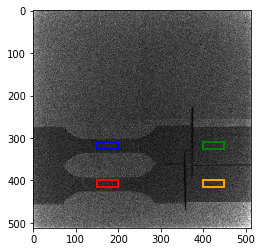

In [11]:
#ROIs for 90 deg orientation
roi_stress1 = np.array([150,400,200,415])
roi_stress2 = np.array([150,310,200,325])
roi_ref1 = np.array([400,400,450,415])
roi_ref2 = np.array([400,310,450,325])

fig,ax =plt.subplots()
value = rootpath + coll_dir[0]+'/'+coll_files[0][1500]
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,400),(200,400),(200,415),(150,415)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,310),(200,310),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,400),(400,400),(400,415),(450,415)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,310),(400,310),(400,325),(450,325)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)


print(len(coll_files[0]))
print(np.shape(spectrum_ref1))

for i in range(0, len(coll_files[0])):
    name = rootpath + coll_dir[0]+'/'+coll_files[0][i]
    with fits.open(name) as f:
        im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
        im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
        im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
        im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
        spectrum_ref1[0][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
        spectrum_ref2[0][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
        spectrum_stress1[0][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
        spectrum_stress2[0][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
    
    nameOB = pathOB + coll_ob[i]
    with fits.open(nameOB) as fOB:
        ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[0]
        ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[0]
        ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[0]
        ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[0]
        spectrum_ob_ref1[0][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
        spectrum_ob_ref2[0][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
        spectrum_ob_stress1[0][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
        spectrum_ob_stress2[0][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



    


/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected/Sample_10099deg_Corrected_01500.fits


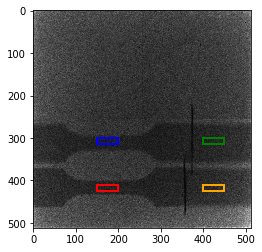

In [12]:
# ROIs for orientation: 99
roi_stress1 = np.array([150,410,200,425])
roi_stress2 = np.array([150,300,200,315])
roi_ref1 = np.array([400,410,450,425])
roi_ref2 = np.array([400,300,450,315])


fig,ax =plt.subplots()
value = rootpath + coll_dir[1]+'/'+coll_files[1][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,410),(200,410),(200,425),(150,425)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,410),(400,410),(400,425),(450,425)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)

for i in range(0, len(coll_files[0])):
    name = rootpath + coll_dir[1]+'/'+coll_files[1][i]
    with fits.open(name) as f:
        im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
        im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
        im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
        im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
        spectrum_ref1[1][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
        spectrum_ref2[1][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
        spectrum_stress1[1][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
        spectrum_stress2[1][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
    
    nameOB = pathOB + coll_ob[i]
    with fits.open(nameOB) as fOB:
        ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[1]
        ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[1]
        ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[1]
        ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[1]
        spectrum_ob_ref1[1][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
        spectrum_ob_ref2[1][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
        spectrum_ob_stress1[1][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
        spectrum_ob_stress2[1][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])


/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected/Sample_10108deg_Corrected_01500.fits
Sample_10108deg_Corrected
Sample_10117deg_Corrected
Sample_10126deg_Corrected
Sample_10135deg_Corrected
Sample_10144deg_Corrected
Sample_10153deg_Corrected
Sample_10162deg_Corrected


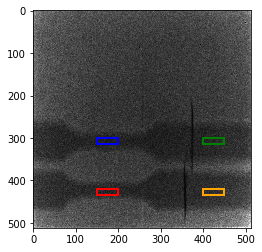

In [13]:
# ROIs FOR ORIENTATION;  108, 117, 126, 135, 144, 153, 162
roi_stress1 = np.array([150,420,200,435])
roi_stress2 = np.array([150,300,200,315])
roi_ref1 = np.array([400,420,450,435])
roi_ref2 = np.array([400,300,450,315])

fig,ax =plt.subplots()
value = rootpath + coll_dir[2]+'/'+coll_files[2][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)

for j in range(2,9):
    print(coll_dir[j])

    for i in range(0, len(coll_files[0])):
        name = rootpath + coll_dir[j]+'/'+coll_files[j][i]
        with fits.open(name) as f:
            im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
            im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
            im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
            im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
            spectrum_ref1[j][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
            spectrum_ref2[j][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
            spectrum_stress1[j][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
            spectrum_stress2[j][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])

        nameOB = pathOB + coll_ob[i]
        with fits.open(nameOB) as fOB:
            ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[j]
            ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[j]
            ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[j]
            ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[j]
            spectrum_ob_ref1[j][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
            spectrum_ob_ref2[j][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
            spectrum_ob_stress1[j][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
            spectrum_ob_stress2[j][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected/Sample_10171deg_Corrected_01500.fits
Sample_10171deg_Corrected
Sample_10180deg_Corrected


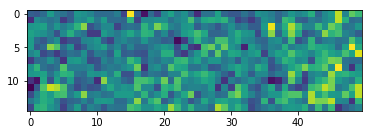

In [48]:
#ROI for 171 and 180 deg orientation
roi_stress1 = np.array([150,420,200,435])
roi_stress2 = np.array([150,310,200,325])
roi_ref1 = np.array([400,420,450,435])
roi_ref2 = np.array([400,310,450,325])


fig,ax =plt.subplots()
value = rootpath + coll_dir[9]+'/'+coll_files[9][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
ax.imshow(myim[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]])
roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,310),(200,310),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,310),(400,310),(400,325),(450,325)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)


for j in range(9,11):
    print(coll_dir[j])

    for i in range(0, len(coll_files[0])):
        name = rootpath + coll_dir[j]+'/'+coll_files[j][i]
        with fits.open(name) as f:
            im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
            im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
            im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
            im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
            spectrum_ref1[j][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
            spectrum_ref2[j][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
            spectrum_stress1[j][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
            spectrum_stress2[j][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])

        nameOB = pathOB + coll_ob[i]
        with fits.open(nameOB) as fOB:
            ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[j]
            ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[j]
            ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[j]
            ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[j]
            spectrum_ob_ref1[j][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
            spectrum_ob_ref2[j][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
            spectrum_ob_stress1[j][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
            spectrum_ob_stress2[j][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected/Sample_10171deg_Corrected_01500.fits


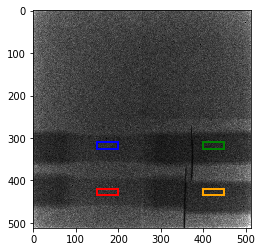

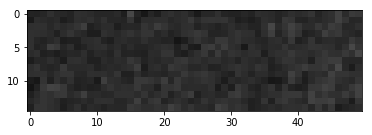

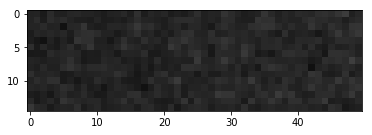

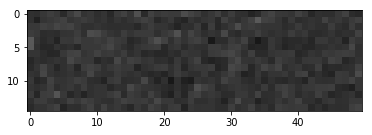

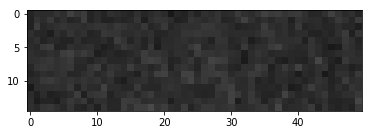

In [53]:
fig,ax =plt.subplots()
value = rootpath + coll_dir[9]+'/'+coll_files[9][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
# ax.imshow(myim[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]])
roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,310),(200,310),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,310),(400,310),(400,325),(450,325)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)

fig, ax = plt.subplots()
ax.imshow(myim[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]],vmin=0, vmax=200, cmap="gray")
fig, ax = plt.subplots()
ax.imshow(myim[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]],vmin=0, vmax=200, cmap="gray")
fig, ax = plt.subplots()
ax.imshow(myim[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]],vmin=0, vmax=200, cmap="gray")
fig, ax = plt.subplots()
ax.imshow(myim[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]],vmin=0, vmax=200, cmap="gray")

In [ ]:
# At this point I have all spectrum for the selected ROIs and need to do some smart plot

In [19]:
def binning (mysignal, newsize):
    binned_signal = np.zeros(newsize)
    bin_size = int(len(mysignal)/newsize)
    for i in range(0, newsize):
        bin_value = np.median(mysignal[i*bin_size:i*bin_size+bin_size])
        binned_signal[i]=bin_value
    
    return (binned_signal)
    

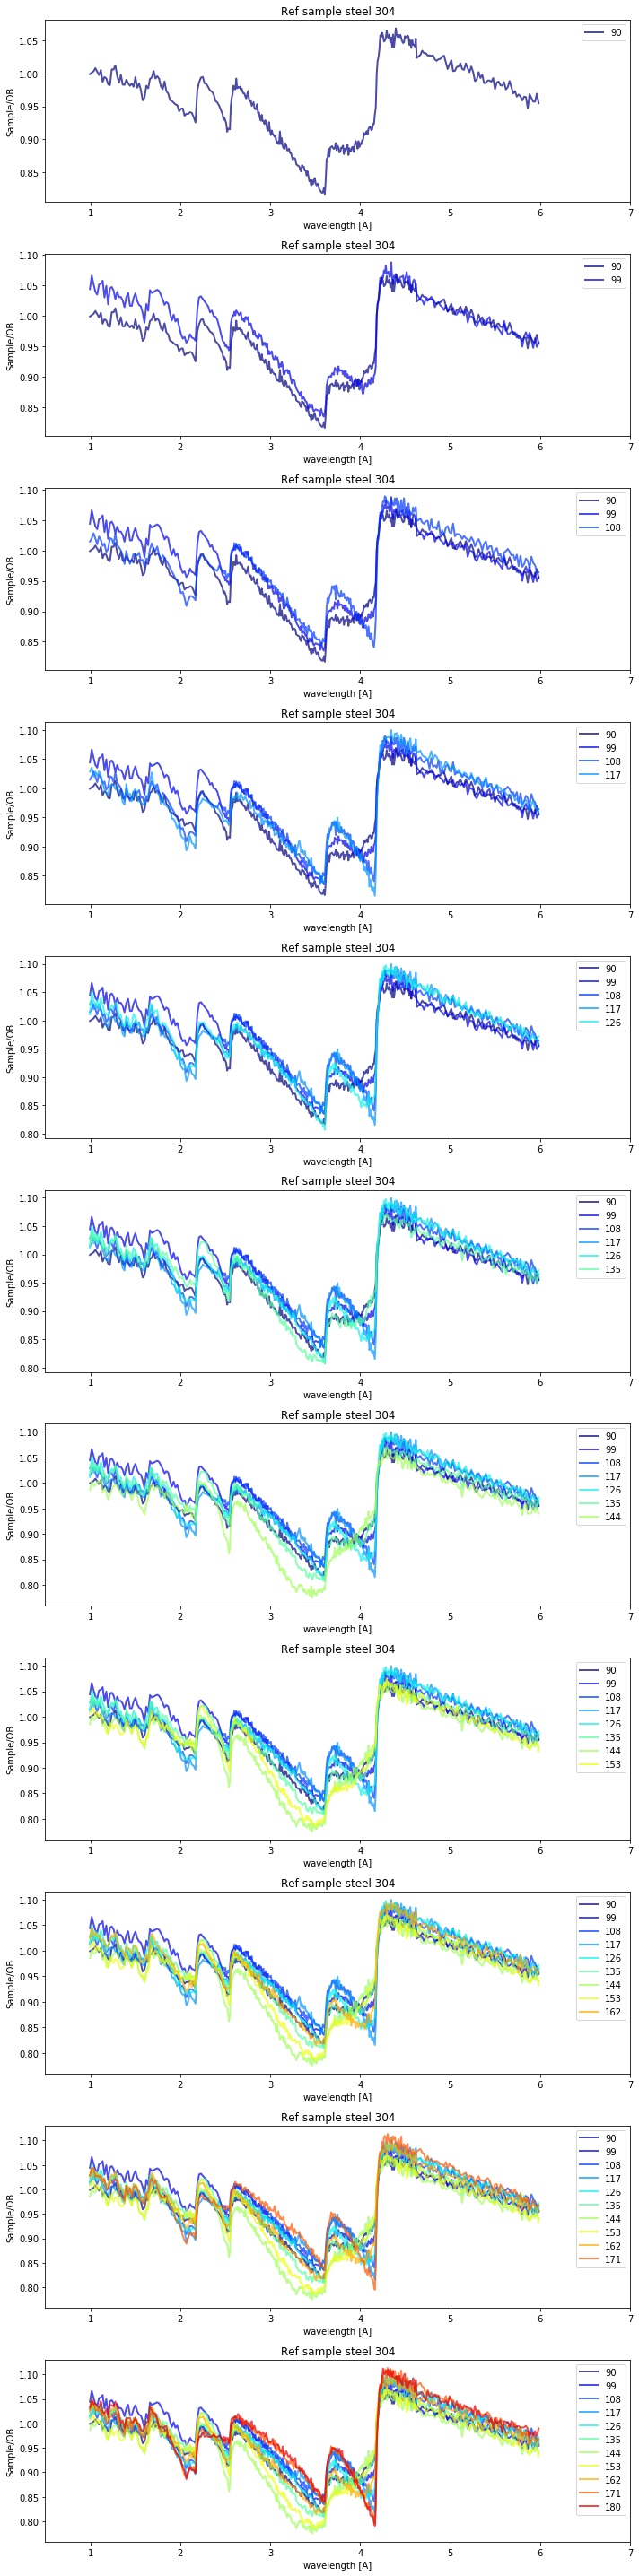

In [20]:
mylambda=tof2l(myTOF)
 

fig, ax = plt.subplots(11,1,figsize=[10,40])
    
for j in range(0, len(coll_dir)):

    # cmap = matplotlib.cm.rainbow
    cmap = matplotlib.cm.jet
    labels = np.chararray(11)
    labels=('90','99','108','117','126','135','144','153','162','171','180')

    for i in range(0, j+1):

        ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
        last_part = np.mean(ref1_spectrum_norm[1500:2000])
        spectrum1_bin = binning(ref1_spectrum_norm/last_part, 350)
        lambda_bin = binning(mylambda, 350)
    
        ax[j].plot(lambda_bin, spectrum1_bin, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i], linewidth=2)

        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Ref_steel_304_binned.eps', format='eps', dpi=400)



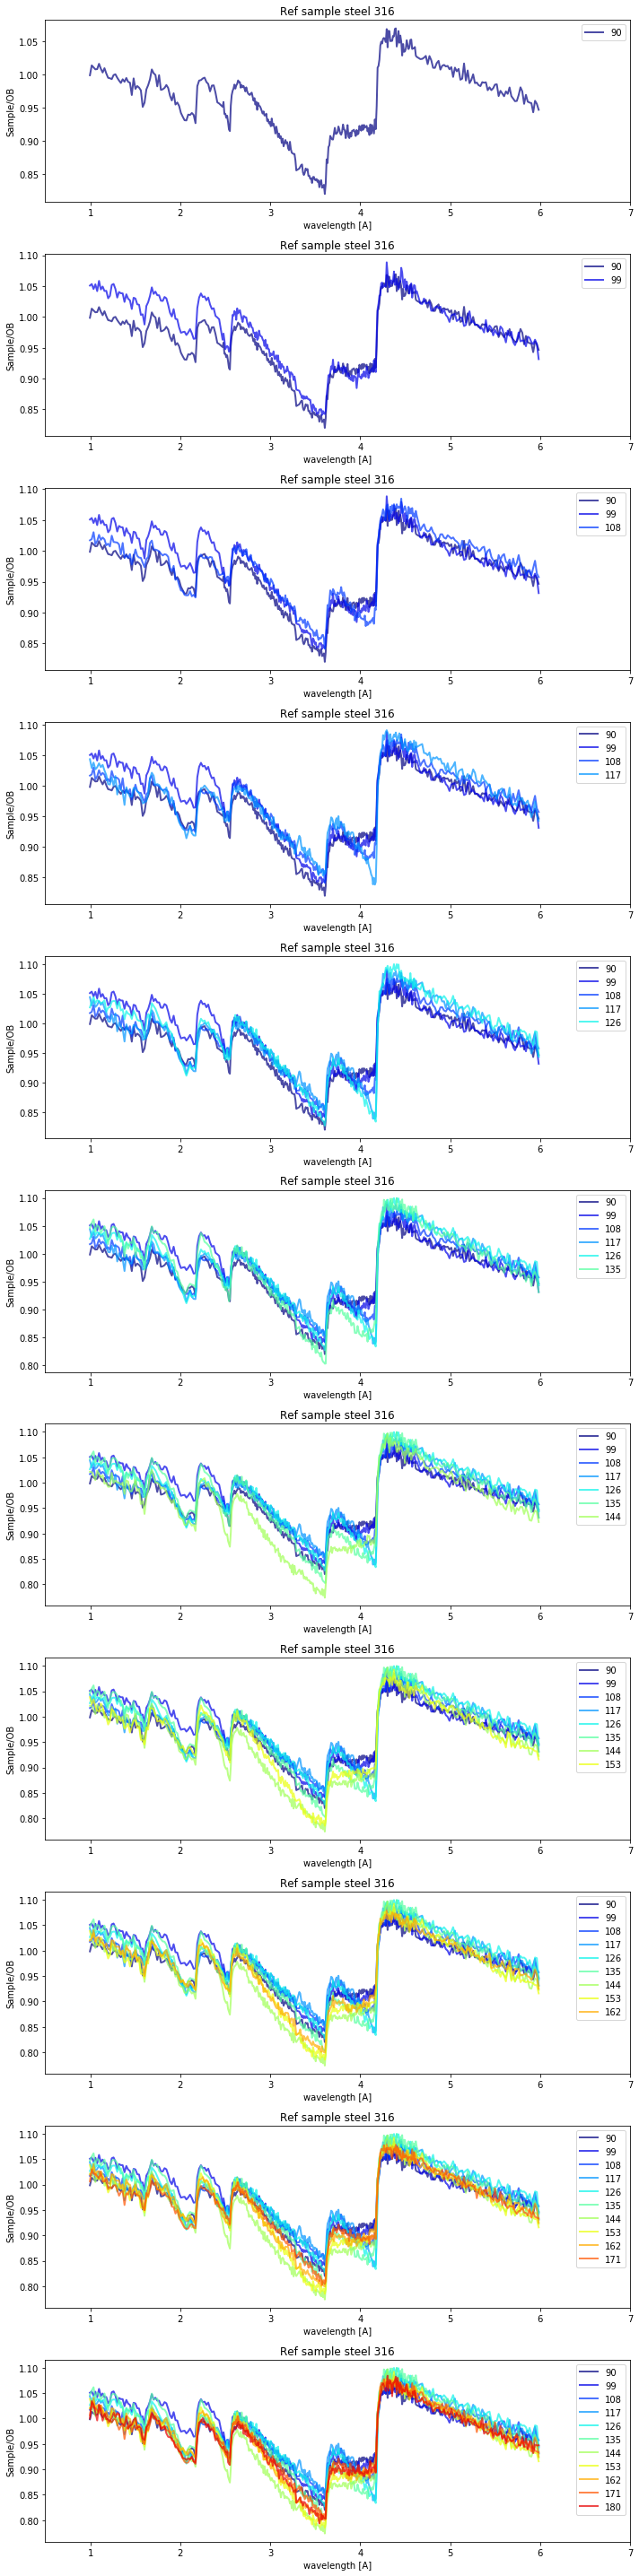

In [21]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
        last_part = np.mean(ref2_spectrum_norm[1500:2000])
        
        ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, ref2_spectrum_bin, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Ref_steel_316_binned.eps', format='eps', dpi=400)


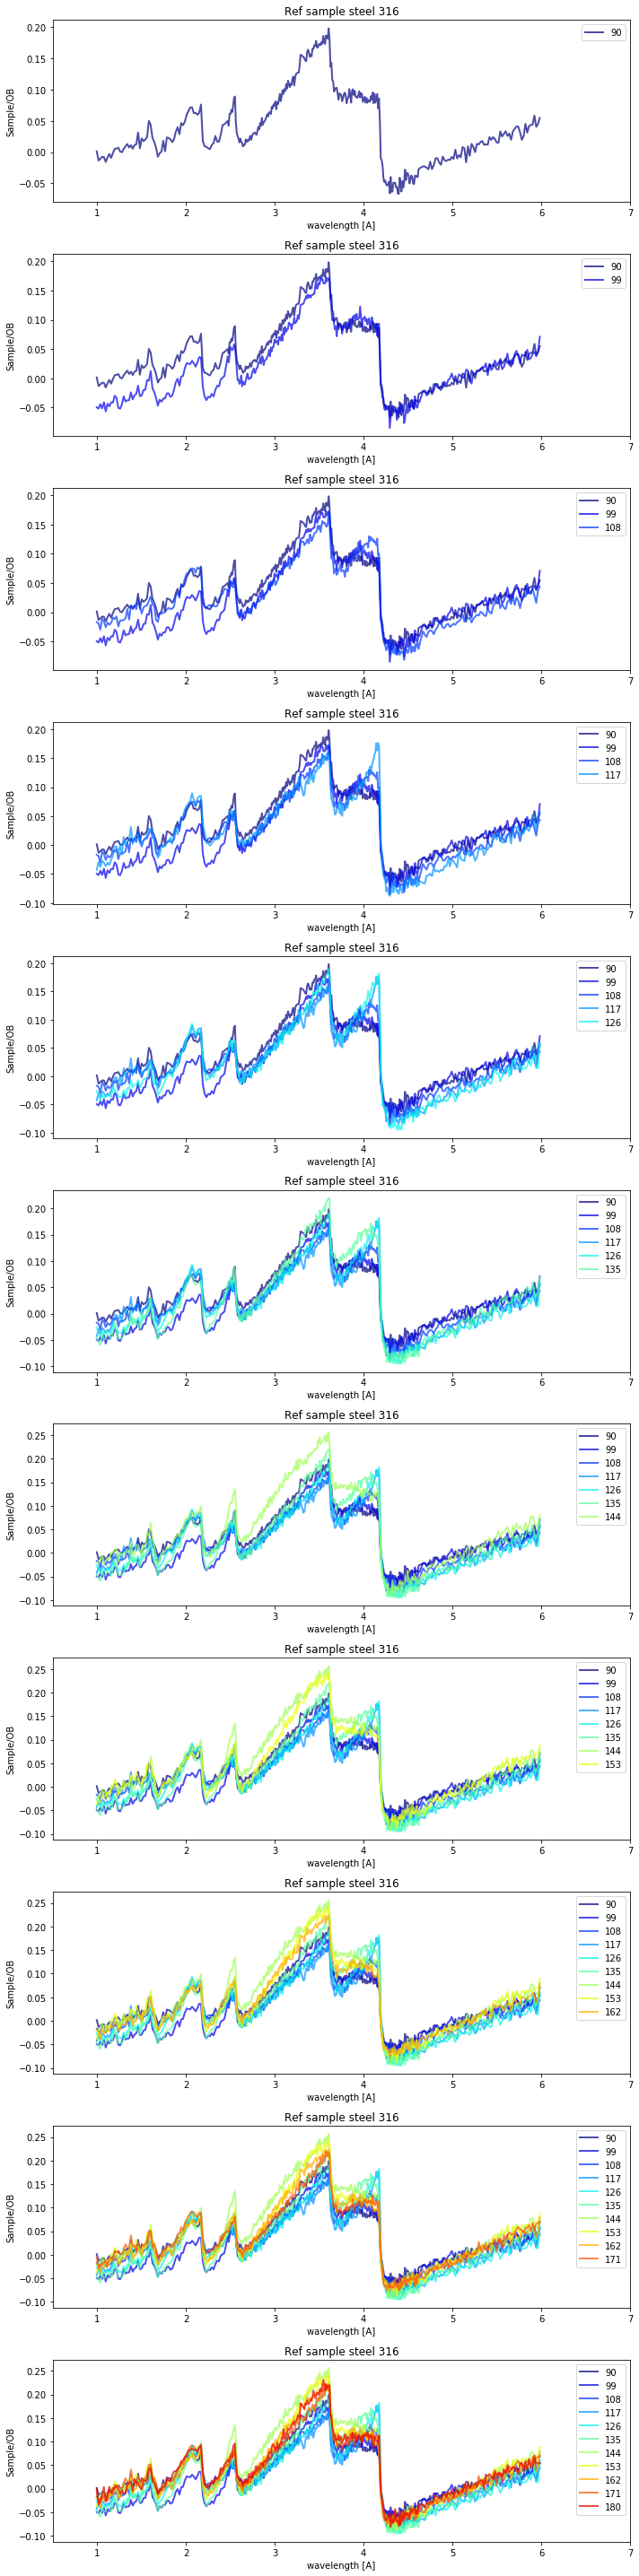

In [22]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
        last_part = np.mean(ref2_spectrum_norm[1500:2000])
        
        ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, -1*np.log(ref2_spectrum_bin), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Log_Ref_steel_316_binned.eps', format='eps', dpi=400)

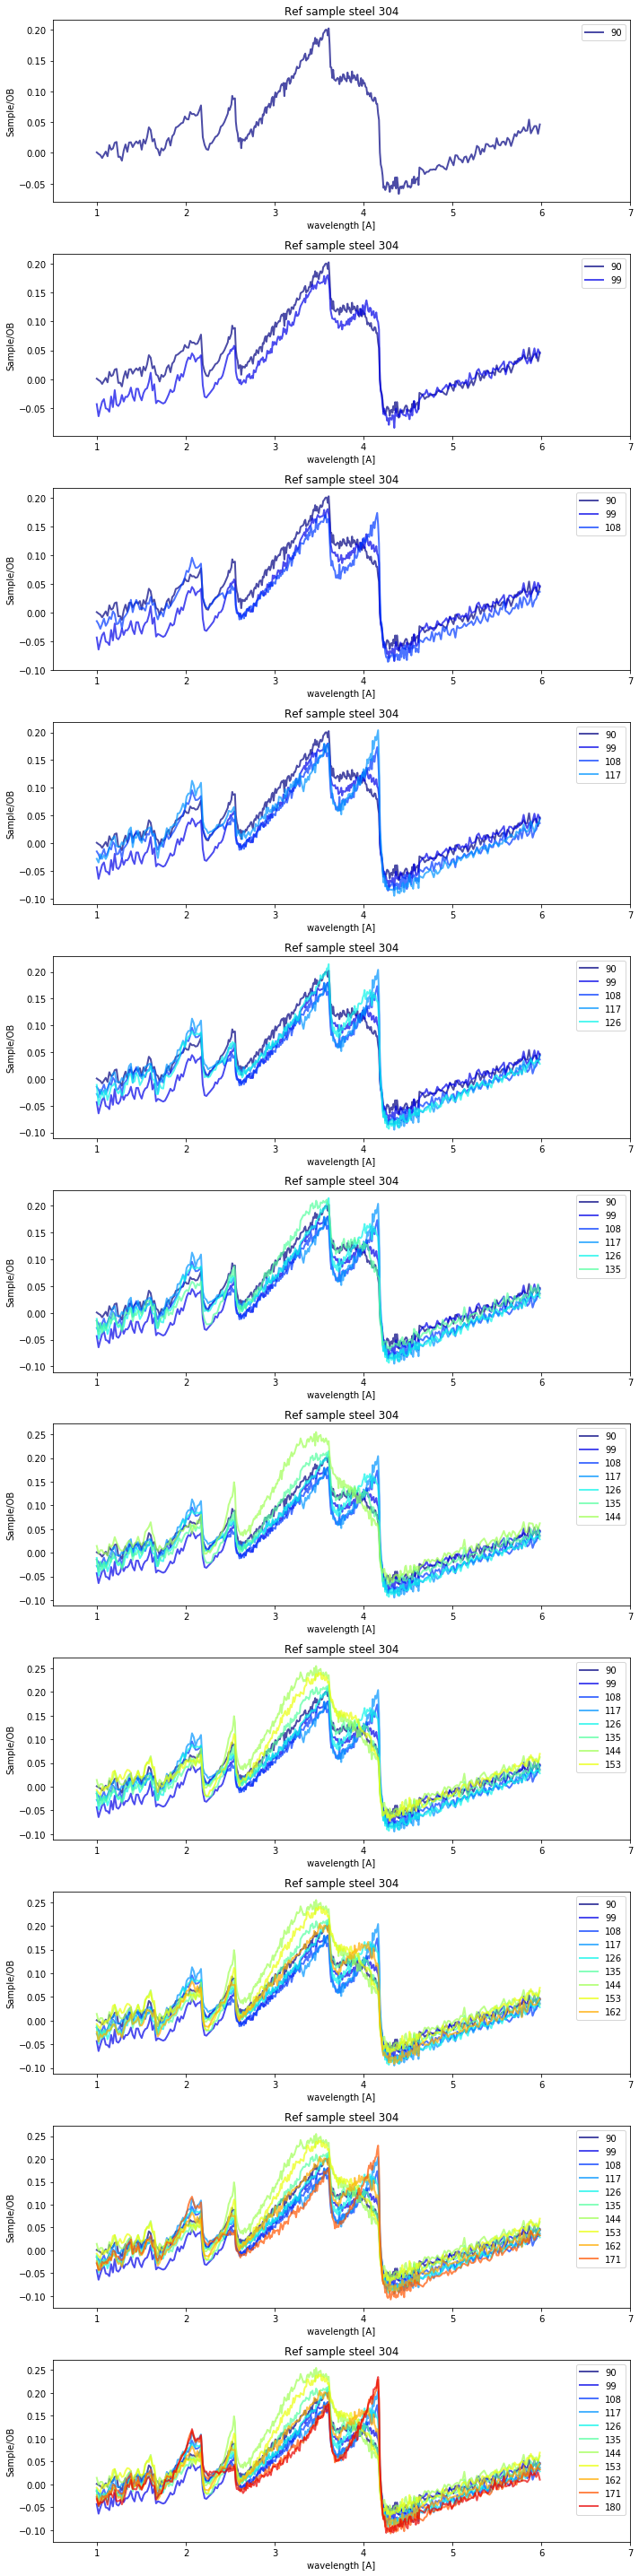

In [23]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
    
for j in range(0, len(coll_dir)):

    # cmap = matplotlib.cm.rainbow
    cmap = matplotlib.cm.jet
    labels = np.chararray(11)
    labels=('90','99','108','117','126','135','144','153','162','171','180')

    for i in range(0, j+1):

        ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
        last_part = np.mean(ref1_spectrum_norm[1500:2000])
        spectrum1_bin = binning(ref1_spectrum_norm/last_part, 350)
        lambda_bin = binning(mylambda, 350)
    
        ax[j].plot(lambda_bin, -1*np.log(spectrum1_bin), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i], linewidth=2)

        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('LogRef_steel_304_binned.eps', format='eps', dpi=400)


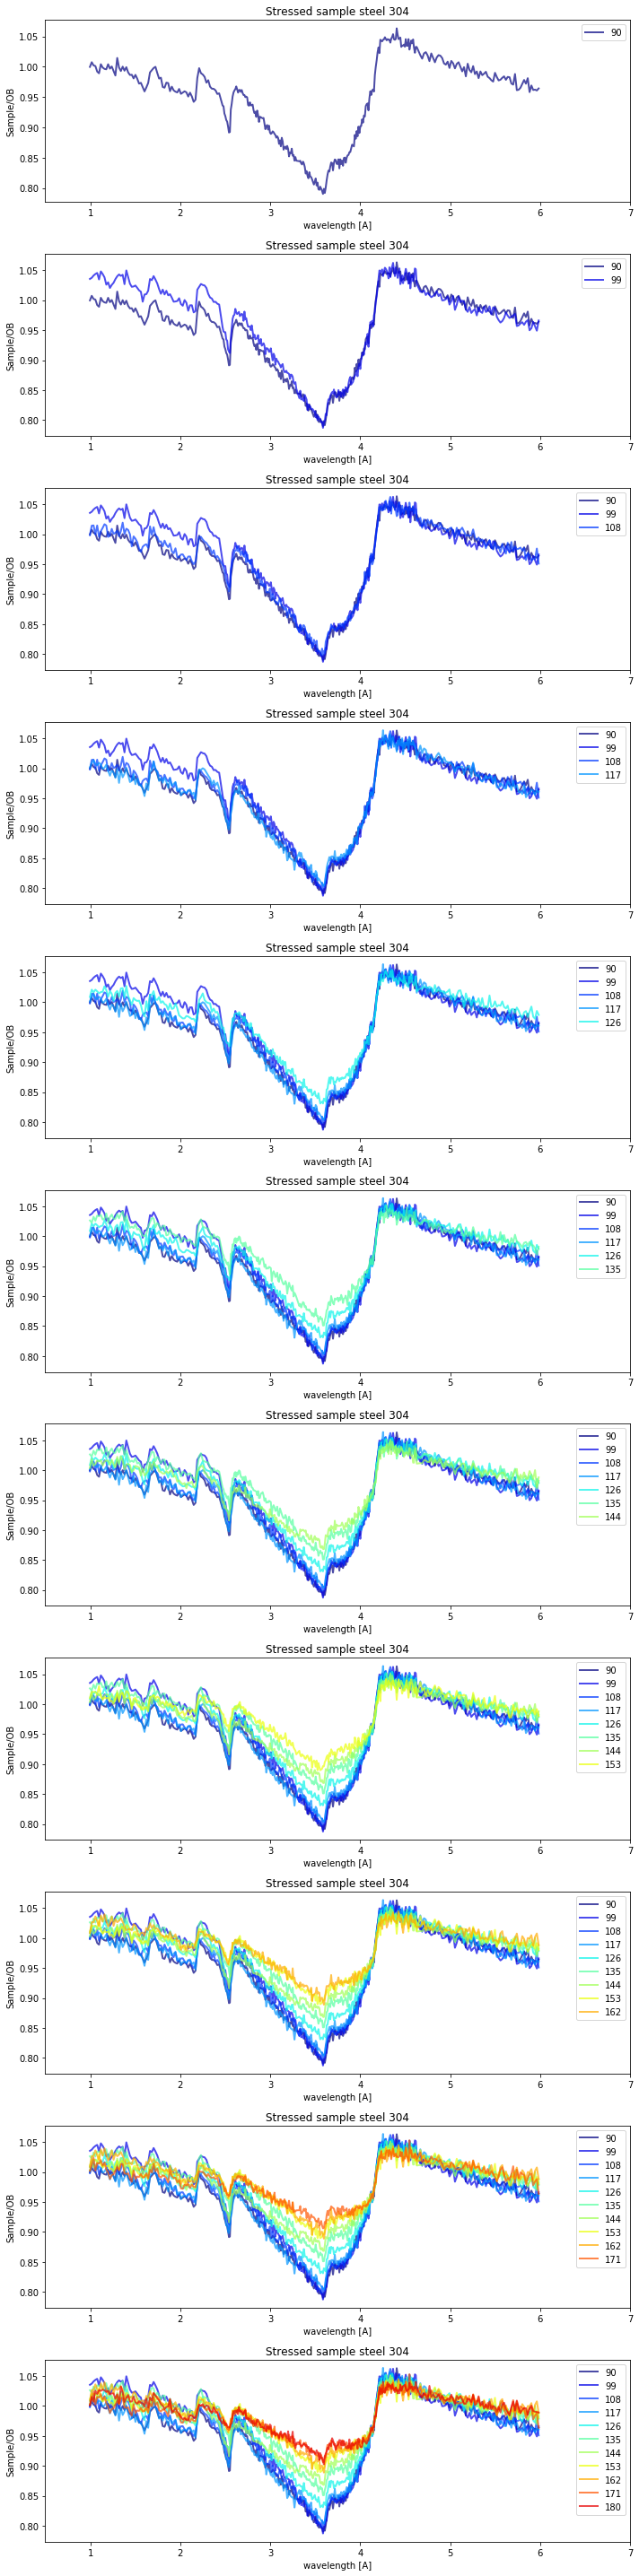

In [24]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
    
        stress1_spectrum_norm=(spectrum_stress1[i][:]/spectrum_ob_stress1[i][:])
        last_part = np.mean(stress1_spectrum_norm[1500:2000])
        stress1_spectrum_binned = binning(stress1_spectrum_norm/last_part, 350)
#         ax[j].plot(mylambda, stress1_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, stress1_spectrum_binned, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Stressed sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')
    
fig.tight_layout()
fig.savefig('Stress_steel_304_binned.eps', format='eps', dpi=400)


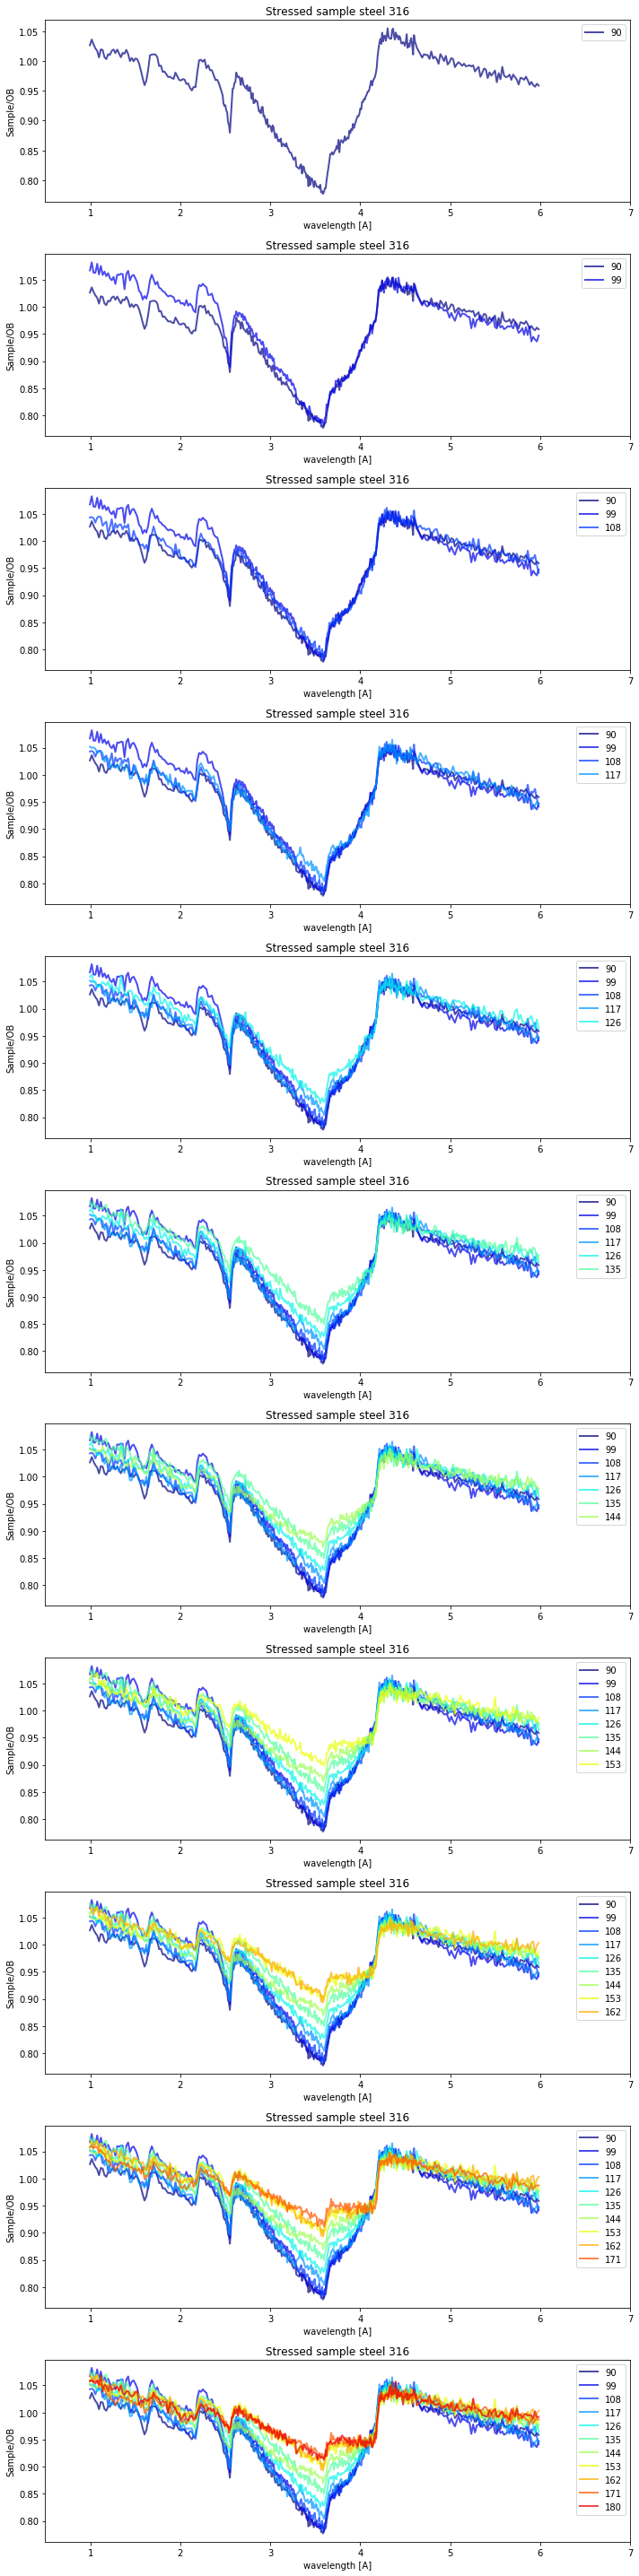

In [25]:

fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
    for i in range(0, j+1):    
        stress2_spectrum_norm=(spectrum_stress2[i][:]/spectrum_ob_stress1[i][:])
        last_part = np.mean(stress2_spectrum_norm[1500:2000])
        
        stress2_spectrum_binned = binning(stress2_spectrum_norm/last_part, 350)
#         ax[j].plot(mylambda, stress2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, stress2_spectrum_binned, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
        ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Stressed sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Stress_steel_316_binned.eps', format='eps', dpi=400)

[4.054 2.866 2.34  2.026 1.812 1.654 1.532 1.434 1.352 1.352 1.282 1.222
 1.17  1.124 1.124 1.046 1.014 0.984 0.984 0.956 0.956 0.93  0.93  0.906
 0.884 0.864 0.846 0.828 0.81  0.81  0.81  0.794 0.78  0.78  0.78  0.766
 0.752 0.728 0.728 0.716 0.706 0.706 0.706 0.696 0.696 0.686 0.676 0.676
 0.666 0.666 0.666 0.658 0.65  0.64  0.632 0.626 0.618 0.618 0.612 0.604
 0.604 0.592 0.586 0.58  0.58  0.574 0.568 0.562 0.552 0.546 0.536 0.536
 0.536 0.532 0.518 0.506 0.498 0.496 0.492 0.488 0.478 0.45  0.448 0.414]
[4.142 3.588 2.536 2.164 2.07  1.794 1.646 1.604 1.464 1.38  1.38  1.268
 1.212 1.196 1.196 1.134 1.094 1.082 1.036 1.004 1.004 0.994 0.958 0.934
 0.934 0.896 0.876 0.87  0.87  0.846 0.846 0.828 0.828 0.822 0.802 0.788
 0.782 0.764 0.732 0.722 0.722 0.718 0.704 0.694 0.69  0.666 0.646 0.634
 0.624 0.616 0.598 0.592 0.56  0.518]


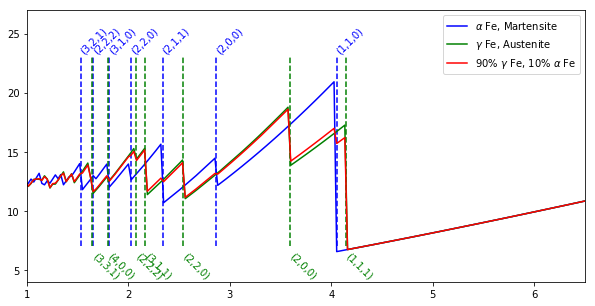

In [45]:
mylambda = np.genfromtxt('lambda.txt',usecols=0)
myalpha = np.genfromtxt('alpha.txt',usecols=0)
mygamma = np.genfromtxt('gamma.txt',usecols=0)

dhkl_alphaFe = np.genfromtxt('alphaFe_hkl', usecols=4)
h_alphaFe= np.genfromtxt('alphaFe_hkl', usecols=0)
k_alphaFe= np.genfromtxt('alphaFe_hkl', usecols=1)
l_alphaFe= np.genfromtxt('alphaFe_hkl', usecols=2)

dhkl_gammaFe = np.genfromtxt('gammaFe_hkl', usecols=4)
h_gammaFe= np.genfromtxt('gammaFe_hkl', usecols=0)
k_gammaFe= np.genfromtxt('gammaFe_hkl', usecols=1)
l_gammaFe= np.genfromtxt('gammaFe_hkl', usecols=2)

print(dhkl_alphaFe*2)
print(dhkl_gammaFe*2)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mylambda, myalpha, label=r'$\alpha$ Fe, Martensite', color='b')

for i in range(0,7):
    plt.plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([7,23]), '--b')
    mytext = '('+str((h_alphaFe[i]).astype(int))+','+str(k_alphaFe[i].astype(int))+','+str(l_alphaFe[i].astype(int))+')'
    plt.text(2*dhkl_alphaFe[i]-0.02,25, mytext, rotation=45, color='b')

plt.plot(mylambda, mygamma, label=r'$\gamma$ Fe, Austenite', color='g')

for i in range(0,7):
    plt.plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([7,23]), '--g')
    mytext = '('+str((h_gammaFe[i]).astype(int))+','+str(k_gammaFe[i].astype(int))+','+str(l_gammaFe[i].astype(int))+')'
    plt.text(2*dhkl_gammaFe[i]-0.02,6, mytext, rotation=-45, color='g')
plt.plot(mylambda, 0.9*mygamma+0.1*myalpha, label=r'90% $\gamma$ Fe, 10% $\alpha$ Fe', color='r')
plt.legend(loc='upper right')
plt.xlim(1,6.5)
plt.ylim(4,27)
# plt.show()

fig.savefig('TheoreticalSpectraWithIndices.eps', format='eps', dpi=400)

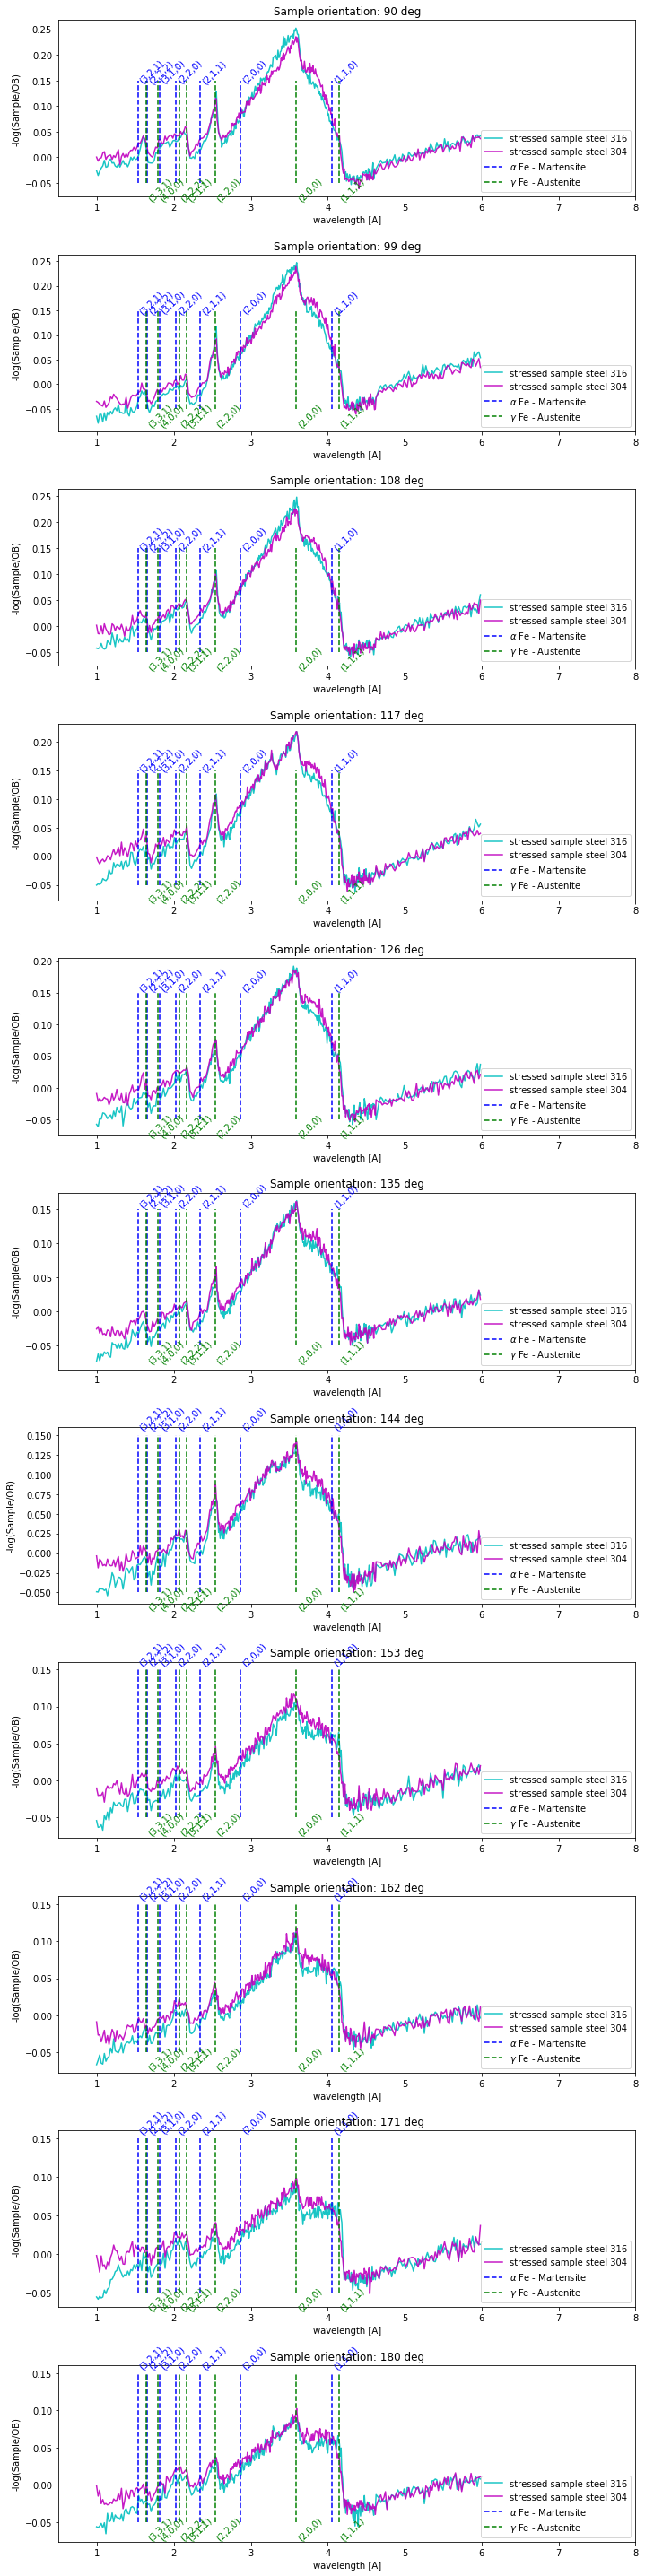

In [46]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
        
    stress2_spectrum_norm=(spectrum_stress2[j][:]/spectrum_ob_stress1[j][:])
    last_part = np.mean(stress2_spectrum_norm[1500:2000])        
    stress2_spectrum_binned = binning(stress2_spectrum_norm/last_part, 350)


    stress1_spectrum_norm=(spectrum_stress1[j][:]/spectrum_ob_stress1[j][:])
    last_part_1 = np.mean(stress1_spectrum_norm[1500:2000])        
    stress1_spectrum_binned = binning(stress1_spectrum_norm/last_part_1, 350)
#         ax[j].plot(mylambda, stress2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
    ax[j].plot(lambda_bin, -1*np.log(stress2_spectrum_binned), color='c', alpha=0.9, label='stressed sample steel 316')
    ax[j].plot(lambda_bin, -1*np.log(stress1_spectrum_binned), color='m', alpha=0.9, label='stressed sample steel 304')
    ax[j].set_xlim(0.5,8.0)
    ax[j].set_title('Sample orientation: '+str(labels[j])+' deg')
    ax[j].set_xlabel('wavelength [A]')
    ax[j].set_ylabel('-log(Sample/OB)')
    
    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.15]), '--b',label=r'$\alpha$ Fe - Martensite')
        else:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.15]), '--b')
        mytext = '('+str((h_alphaFe[i]).astype(int))+','+str(k_alphaFe[i].astype(int))+','+str(l_alphaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_alphaFe[i],0.18, mytext, rotation=45, color='b')

    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.15]), '--g', label=r'$\gamma$ Fe - Austenite')
        else:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.15]), '--g')                    
        
        mytext = '('+str((h_gammaFe[i]).astype(int))+','+str(k_gammaFe[i].astype(int))+','+str(l_gammaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_gammaFe[i],-0.05, mytext, rotation=45, color='g')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='lower right')

fig.tight_layout()
fig.savefig('LogCompared_stressed_samples.eps', format='eps', dpi=400)

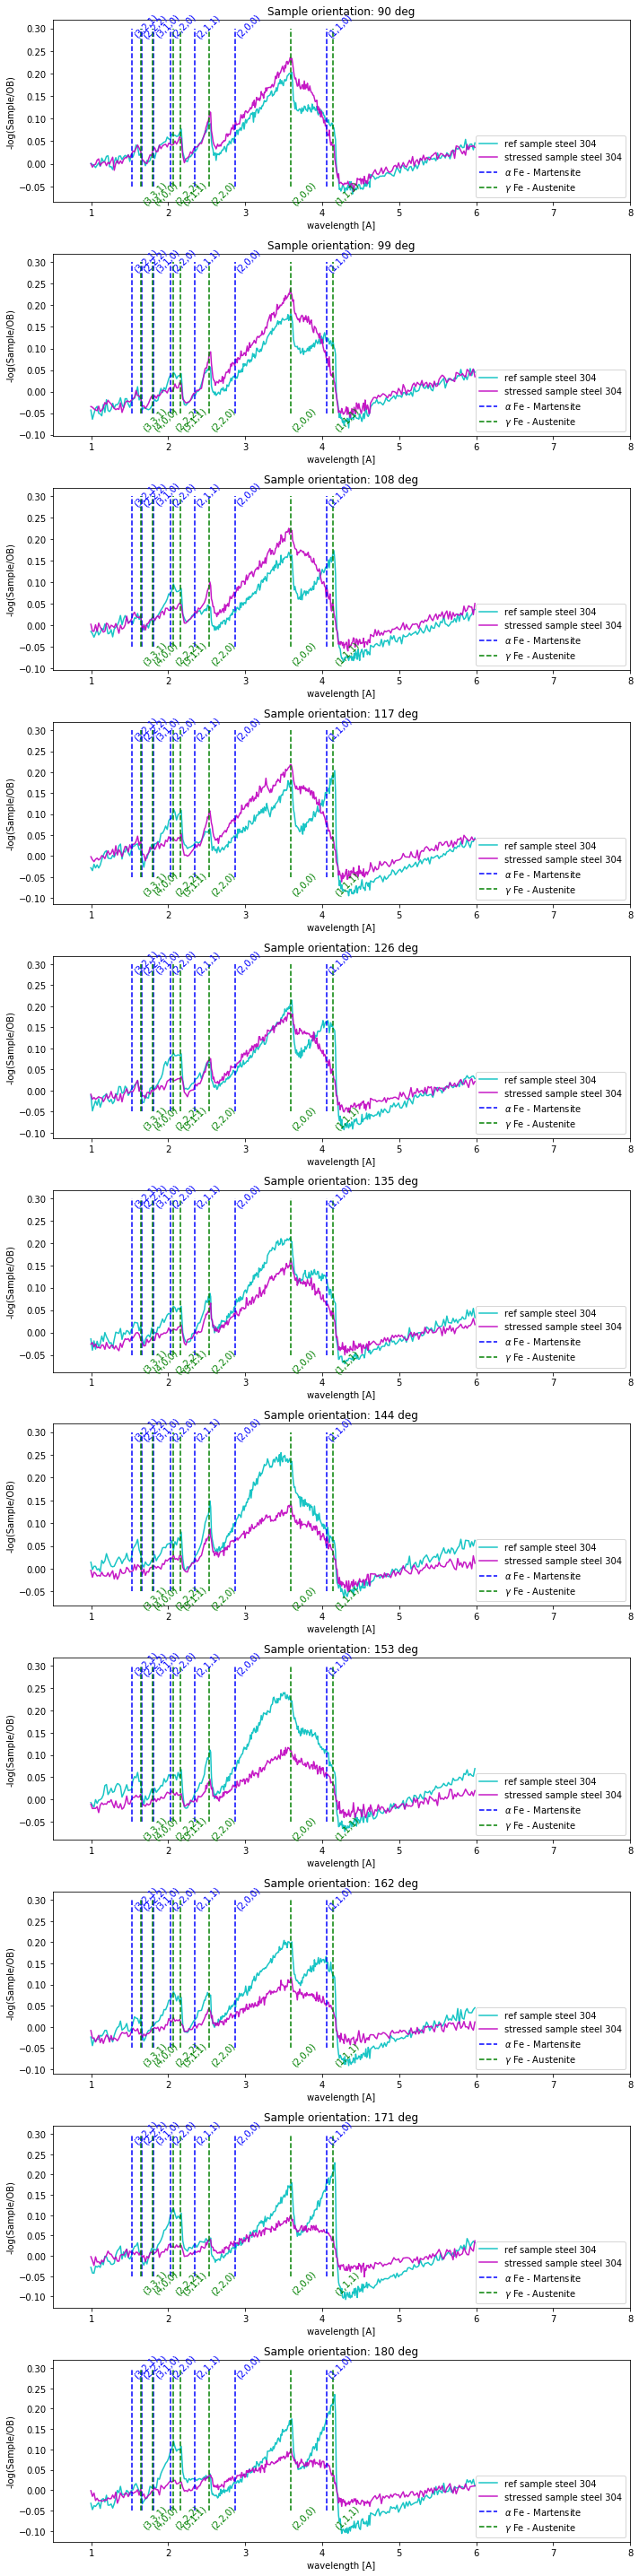

In [47]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
        
    ref1_spectrum_norm=(spectrum_ref1[j][:]/spectrum_ob_ref1[j][:])
    last_part = np.mean(ref1_spectrum_norm[1500:2000])        
    ref1_spectrum_binned = binning(ref1_spectrum_norm/last_part, 350)


    stress1_spectrum_norm=(spectrum_stress1[j][:]/spectrum_ob_stress1[j][:])
    last_part_1 = np.mean(stress1_spectrum_norm[1500:2000])        
    stress1_spectrum_binned = binning(stress1_spectrum_norm/last_part_1, 350)
#         ax[j].plot(mylambda, stress2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
    ax[j].plot(lambda_bin, -1*np.log(ref1_spectrum_binned), color='c', alpha=0.9, label='ref sample steel 304')
    ax[j].plot(lambda_bin, -1*np.log(stress1_spectrum_binned), color='m', alpha=0.9, label='stressed sample steel 304')
    ax[j].set_xlim(0.5,8.0)
    ax[j].set_title('Sample orientation: '+str(labels[j])+' deg')
    ax[j].set_xlabel('wavelength [A]')
    ax[j].set_ylabel('-log(Sample/OB)')
    
    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.3]), '--b',label=r'$\alpha$ Fe - Martensite')
        else:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.3]), '--b')
        mytext = '('+str((h_alphaFe[i]).astype(int))+','+str(k_alphaFe[i].astype(int))+','+str(l_alphaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_alphaFe[i],0.32, mytext, rotation=45, color='b')

    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.3]), '--g', label=r'$\gamma$ Fe - Austenite')
        else:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.3]), '--g')                    
        
        mytext = '('+str((h_gammaFe[i]).astype(int))+','+str(k_gammaFe[i].astype(int))+','+str(l_gammaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_gammaFe[i],-0.05, mytext, rotation=45, color='g')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='lower right')

fig.tight_layout()
fig.savefig('LogCompared_samples_304Fe.eps', format='eps', dpi=400)

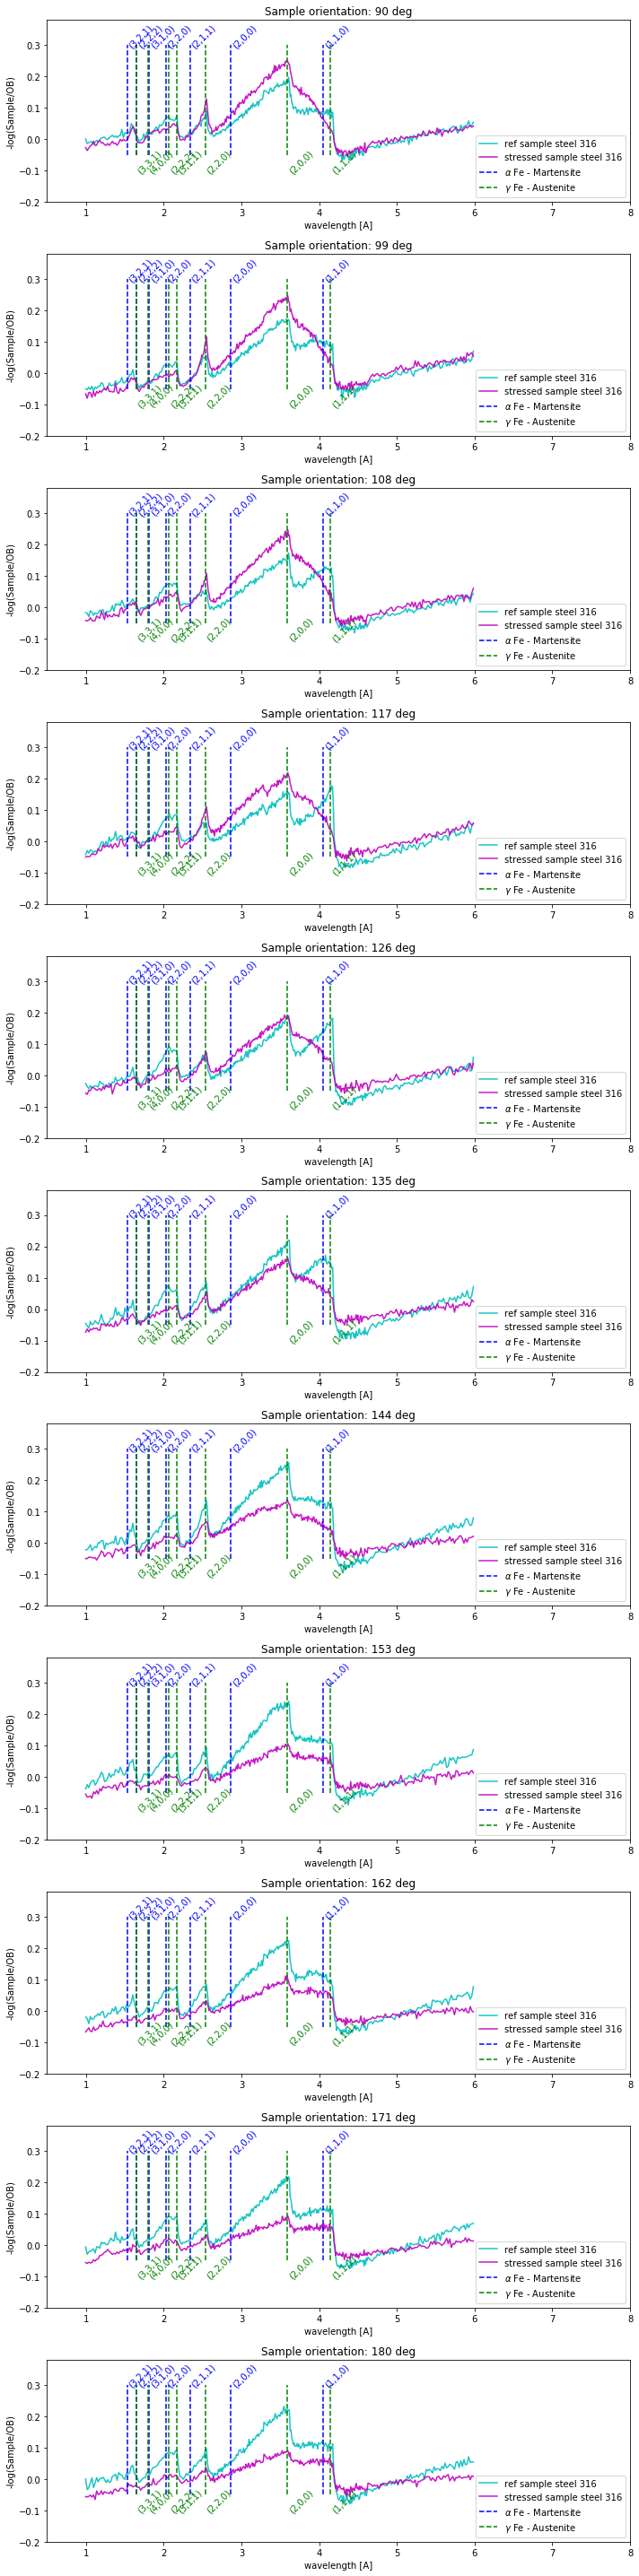

In [67]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
        
    ref2_spectrum_norm=(spectrum_ref2[j][:]/spectrum_ob_ref2[j][:])
    last_part = np.mean(ref2_spectrum_norm[1500:2000])        
    ref2_spectrum_binned = binning(ref2_spectrum_norm/last_part, 350)


    stress2_spectrum_norm=(spectrum_stress2[j][:]/spectrum_ob_stress1[j][:])
    last_part_2 = np.mean(stress2_spectrum_norm[1500:2000])        
    stress2_spectrum_binned = binning(stress2_spectrum_norm/last_part_2, 350)
#         ax[j].plot(mylambda, stress2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
    ax[j].plot(lambda_bin, -1*np.log(ref2_spectrum_binned), color='c', alpha=0.9, label='ref sample steel 316')
    ax[j].plot(lambda_bin, -1*np.log(stress2_spectrum_binned), color='m', alpha=0.9, label='stressed sample steel 316')
    ax[j].set_xlim(0.5,8.0)
    ax[j].set_ylim(-0.2,0.38)
    ax[j].set_title('Sample orientation: '+str(labels[j])+' deg')
    ax[j].set_xlabel('wavelength [A]')
    ax[j].set_ylabel('-log(Sample/OB)')
    
    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.3]), '--b',label=r'$\alpha$ Fe - Martensite')
        else:
            ax[j].plot(np.array([2*dhkl_alphaFe[i],2*dhkl_alphaFe[i]]), np.array([-0.05,0.3]), '--b')
        mytext = '('+str((h_alphaFe[i]).astype(int))+','+str(k_alphaFe[i].astype(int))+','+str(l_alphaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_alphaFe[i],0.35, mytext, rotation=45, color='b')

    for i in range(0,7):
        if i==0:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.3]), '--g', label=r'$\gamma$ Fe - Austenite')
        else:
            ax[j].plot(np.array([2*dhkl_gammaFe[i],2*dhkl_gammaFe[i]]), np.array([-0.05,0.3]), '--g')                    
        
        mytext = '('+str((h_gammaFe[i]).astype(int))+','+str(k_gammaFe[i].astype(int))+','+str(l_gammaFe[i].astype(int))+')'
        ax[j].text(2*dhkl_gammaFe[i],-0.05, mytext, rotation=45, color='g')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='lower right')

fig.tight_layout()
fig.savefig('LogCompared_samples_316Fe.eps', format='eps', dpi=400)

In [89]:
# here I save the computed spectra (without normalization or other processing as txt file)
## todo tomorrow: check if I have saved the right thing

np.savetxt('spectrum_ref_304.txt', spectrum_ref1)
np.savetxt('spectrum_ref_316.txt', spectrum_ref2)
np.savetxt('spectrum_stress_304.txt', spectrum_stress1)
np.savetxt('spectrum_stress_316.txt', spectrum_stress2)
np.savetxt('spectrum_ob_ref_304.txt', spectrum_ob_ref1)
np.savetxt('spectrum_ob_ref_316.txt', spectrum_ob_ref2)
np.savetxt('spectrum_ob_stress_304.txt', spectrum_ob_stress1)
np.savetxt('spectrum_ob_stress_316.txt', spectrum_ob_stress2)
